## Alumno: Brian Alex Fuentes Acuña.
## Padron: 101785.

# Clase 12: Realimentación MIMO y seguimiento de referencias

## Realimentación en sistemas MIMO

Mirar el video de la [clase teórica](https://www.youtube.com/watch?v=Lkcl_9C5WfE) y aplicar lo visto en la resolución del siguiente ejercicio.

Un sistema LTI continuo de dos entradas viene dado por la siguiente ecuación:

$$
    \dot{x}(t) = \left[\begin{matrix}0 & 1\\7 & -4\end{matrix}\right] x(t) + \left[\begin{matrix}1  & 1\\1 & 0\end{matrix}\right] u(t)
$$
$$
    y = \left[\begin{matrix}1 & 3\end{matrix}\right] x(t)
$$

Buscar dos matrices $k$ distintas tal que los autovalores a lazo cerrado sean $\lambda_1 = -4$ y $\lambda_2 = -6$ y con los siguientes métodos:

* El dado en ejemplo de la clase teórica, con transformación a la forma canónica multivariable.
* Calcular con las funciones dadas por las bibliotecas de control utilizadas (por ejemplo, ctrl.place()).

Simular la respuesta de $u(t)$ ante las condiciones iniciales no nulas y comparar los resultados obtenidos. ¿Cuál creés que es la mejor y en qué sentido? 


In [1]:
!pip install control 
import control as ctrl
import numpy as np
import sympy as symb
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
# Completa aquí con tu código


Veamos primero que es sistema sea controlable

In [2]:
#El sistemas es:
A= symb.Matrix( [[0, 1], [7, -4]] )
B= symb.Matrix( [[1, 1], [1, 0]] )
C= symb.Matrix( [[1, 3]] )
D= symb.Matrix( [[0, 0]] )

sys = ctrl.StateSpace(A, B, C, D)
                                                #P=[b1 b2 |Ab1 Ab2]
P= ctrl.ctrb(A,B)
print('P:'); symb.pprint(P)
print('El rango de P es: ', np.linalg.matrix_rank(P) )
print('La matriz es controlable')

P:
 [[1. 1. 1. 0.]
 [1. 0. 3. 7.]]
El rango de P es:  2
La matriz es controlable


Se procede a ubicar los autovalores de $A+BK$ en los autovalores pedidos, $\lambda= -4$ y $\lambda= -6$.

Segun la teorica, busco la forma cacnonica multivariable y procedo:   

In [3]:
#P=[b1 b2 |Ab1 Ab2]-->U =[b1 b2]
U= P[ :,[0, 1] ]                                
print('U: '); symb.pprint(U)
print('rango de U: ', np.linalg.matrix_rank(U) )

#separo las asociadas a la 1er y 2da entrada, [b1  b2 ]   mu1=1,  mu2=1
V= U   
# cant_mu1 + cant_mu2 = rg(P).
Vi= np.linalg.inv(V)                            #inversa de V
print('V: '); symb.pprint(V)
#de V obtengo las ultimas filas asociadas a las entradas.
#en este caso es unica para cada entrada por lo que T^-1= vi.
Ti= Vi
T= np.linalg.inv(Ti)

A_ = Ti*A*T
print('A_: '); symb.pprint(A_)

B_= Ti*B
print('B_ :'); symb.pprint(B_)

#Ades_= A_ + B_.K_

#El polinomio caracteristico deseado es:
FiDes= np.poly([-4, -6])
alphaDes= np.flip(FiDes)

Ades_= symb.Matrix([ [0, 1], [-alphaDes[0], -alphaDes[1]] ])
print('Ades_ :'); symb.pprint( Ades_ )

 #Quiero lograr A_ + B_.K_= Ades_ 
 # A_ + B_.K_ = A_ + [K1 K2; K3 K4]
 #              [0 1; 7 -4] + [K1 0; 0 K2]= [ (K1+3)   (K2+7)  ]
 #                                          [ (K3-2)   (K4-7)  ]
 
 ##--> K1+3=0 ; K2+7=1; K3-2= -24; K4-7= -10
 ##### K1=-3   #K2=-6   #K3= -22   #K4= -3.
K_= symb.Matrix([[-3, -6],[-22, -3]])
print('matriz K_:'); symb.pprint(K_)

print('Autovalores de A_ + B_.K_', (A_ + B_*K_).eigenvals())#Todo OK.
#Volvamos a las variables de estado originales.
K= K_*Ti
#Vuelvo a comprobar:
print('Autovalores de A_ + B_.K_', (A + B*K).eigenvals())#Todo OK.
print('K: '); symb.pprint(K)

U: 
 [[1. 1.]
 [1. 0.]]
rango de U:  2
V: 
 [[1. 1.]
 [1. 0.]]
A_: 
⎡3.0   7.0 ⎤
⎢          ⎥
⎣-2.0  -7.0⎦
B_ :
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
Ades_ :
⎡  0      1  ⎤
⎢            ⎥
⎣-24.0  -10.0⎦
matriz K_:
⎡-3   -6⎤
⎢       ⎥
⎣-22  -3⎦
Autovalores de A_ + B_.K_ {-4: 1, -6: 1}
Autovalores de A_ + B_.K_ {-4: 1, -6: 1}
K: 
⎡-6.0   3.0 ⎤
⎢           ⎥
⎣-3.0  -19.0⎦


La matriz $K$ necesaria para ubicar los polos es: 

Según el metodo teorico:
$$  K= \begin{bmatrix} -3 & -6 \\ -22 & -3 \end{bmatrix} $$

Segun el metodo brindado por el sofware, *place()*
$$  KK= \begin{bmatrix} -7 & 0 \\ 1 & -1 \end{bmatrix} $$
(la funcion place da resultado distinto en python y matlab)

In [4]:
##Probamos con otro metodo brindado por el sofware.

A = symb.Matrix([[0, 1], [7, -4]])
B = symb.Matrix([[1, 1], [1, 0]] )

KK = -ctrl.place([[0, 1], [7, -4]] , [[1, 1], [1, 0]] , [-4, -6])
print('KK'); symb.pprint(KK)

print('Numero de cond. de K: ', K.condition_number() )
print('Numero de cond de KK: ', np.linalg.cond(KK) )

KK= symb.Matrix([[-7, 0], [1, -1]])
#print('KK'); symb.pprint(KK)

#ES MEJOR LA RELACION DE K, DADO POR EL METODO HALLADO.
#print('Autovalores de A+BK:' ( A + B*KK ).eigenvals())
print('Autovalores de A + B.KK:', (A + B*KK).eigenvals() )


KK
 [[-7.00000000e+00  7.85046229e-17]
 [ 1.00000000e+00 -1.00000000e+00]]
Numero de cond. de K:  sqrt(13*sqrt(661)/2 + 415/2)/sqrt(415/2 - 13*sqrt(661)/2)
Numero de cond de KK:  7.14577138149692
Autovalores de A + B.KK: {-6: 1, -4: 1}


Calculemos las respuestas temporales de los estados $x_1(t)$ y $x_2(t)$ para condiciones iniciales, el particular se eligio $x_0= [2, 1]$

In [5]:
K= symb.Matrix([ [-6, 3], [-3, -19] ]) #lo harcodeo por que quiero y por que puedo.
K1= K[0, 0]; K2= K[0, 1]; K3=K[1, 0]; K4=K[1, 1];

'''
#FORMA ALTERNATIVA DE HACERLO
def f_mimo(t, x):
    #u(t) = Kx(t)
    #K=       [K1 K2; K3 K4]
    #(A+BK)=  ( [ K1 + K3,  K2 + K4 + 1]; [  K1 + 7,       K2 - 4] )

    f1= (K1 + K3) * x[0] +  (K2 + K4 + 1) * x[1]
    f2= (K1 + 7) * x[0] + (K2 - 4) * x[1]
    return [f1, f2]  #.item()
#################################
#scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
#--------------------------------------------------------------------------------------------------------------------------------------------------------
sol = sp.integrate.solve_ivp(f_mimo, (0, 1.5), x0, t_eval= np.arange(0, 1.5, 0.01), dense_output=True, rtol=1e-5, atol=1e-5)

x1=               sol.y[0]
x2=               sol.y[1]
tiempo =          sol.t
'''

"\n#FORMA ALTERNATIVA DE HACERLO\ndef f_mimo(t, x):\n    #u(t) = Kx(t)\n    #K=       [K1 K2; K3 K4]\n    #(A+BK)=  ( [ K1 + K3,  K2 + K4 + 1]; [  K1 + 7,       K2 - 4] )\n\n    f1= (K1 + K3) * x[0] +  (K2 + K4 + 1) * x[1]\n    f2= (K1 + 7) * x[0] + (K2 - 4) * x[1]\n    return [f1, f2]  #.item()\n#################################\n#scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)\n#--------------------------------------------------------------------------------------------------------------------------------------------------------\nsol = sp.integrate.solve_ivp(f_mimo, (0, 1.5), x0, t_eval= np.arange(0, 1.5, 0.01), dense_output=True, rtol=1e-5, atol=1e-5)\n\nx1=               sol.y[0]\nx2=               sol.y[1]\ntiempo =          sol.t\n"

A = [[ -9. -15.]
     [  1.  -1.]]

B = [[1. 1.]
     [1. 0.]]

C = [[1. 3.]]

D = [[0. 0.]]

Los autovalores a lazo cerrado son:  [-6. -4.]


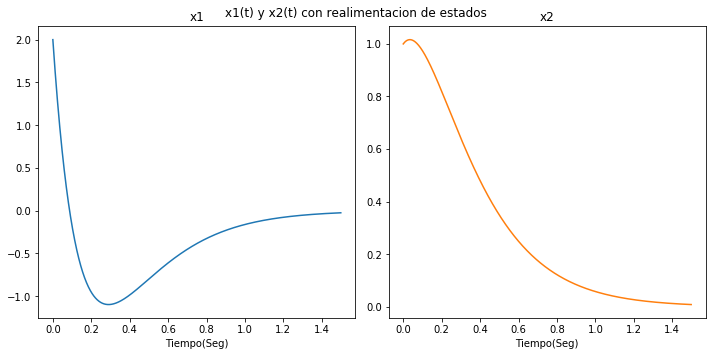

In [6]:
A_realimentado = sys.A + sys.B*K
C_realimentado = C + D*K
sys_realimentado = ctrl.ss(A_realimentado, B, C_realimentado, D)
print(sys_realimentado)

print('Los autovalores a lazo cerrado son: ', np.linalg.eigvals(sys_realimentado.A))

t_ini = 0
t_final = 1.5
t_step = 1e-3
t = np.arange(t_ini, t_final, t_step)

x0 = [2, 1] # Selecciono condiciones iniciales para el estado. Pensar: ¿por qué me da y(0) = 1?

tiempo, y, estados = ctrl.initial_response(sys_realimentado, t, x0, return_x=True)
x1= estados[0, :] 
x2= estados[1, :]

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('x1(t) y x2(t) con realimentacion de estados')
axs[0].plot(tiempo, x1)
axs[0].set_title('x1')
axs[1].plot(tiempo, x2, 'tab:orange')
axs[1].set_title('x2')

for ax in axs.flat:
    ax.set(xlabel='Tiempo(Seg)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
fig.tight_layout()


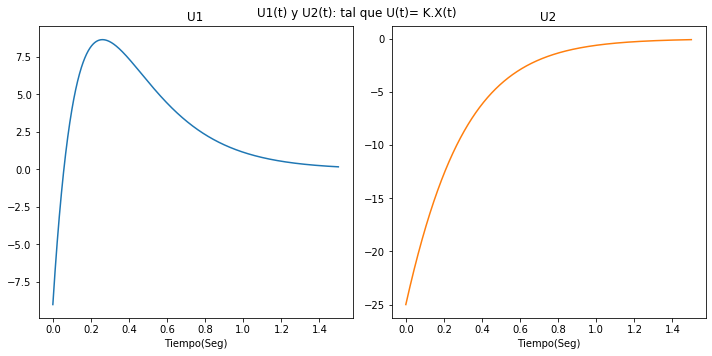

In [7]:
#Apartir de las soluciones X1 y X2 se puede obtener la señal de entrada dado que U=K*X
#U=K*X U= [K1 K2; K3 K4]*[x1 x2]'= [ (K1*x1 + K2*x2) ; (K3*x1 + K4*x2) ]
U1= K1*x1 + K2*x2
U2= K3*x1 + K4*x2

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('U1(t) y U2(t): tal que U(t)= K.X(t)')
axs[0].plot(tiempo, U1)
axs[0].set_title('U1')
axs[1].plot(tiempo, U2, 'tab:orange')
axs[1].set_title('U2')

for ax in axs.flat:
    ax.set(xlabel='Tiempo(Seg)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
fig.tight_layout()

Finalmente pongamos a la vista las respuestas temporales de las $U$ obtenidas con $K$ y $KK$, metodo teorico y por *ctrl.place()* respectivamente.

In [8]:
#Defino el sistema para el  KK
A_realimentadop = sys.A + sys.B*KK
C_realimentadop = C + D*KK
sys_realimentadop = ctrl.ss(A_realimentadop, B, C_realimentadop, D)

print('Los autovalores a lazo cerrado son: ', np.linalg.eigvals(sys_realimentadop.A))

tiempo, yp, estadosp = ctrl.initial_response(sys_realimentadop, t, x0, return_x=True)
x1p= estados[0, :] 
x2p= estados[1, :]


Los autovalores a lazo cerrado son:  [-6. -4.]


Luego graficando juntas las señales de entrada para $K$ y $KK$.

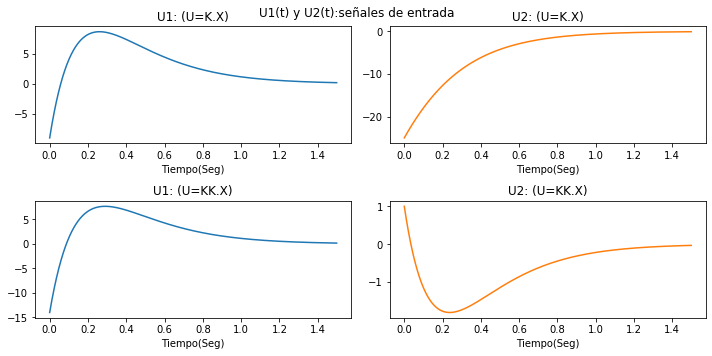

In [9]:

KK1= KK[0, 0]; KK2= KK[0, 1]; KK3=KK[1, 0]; KK4=KK[1, 1];

U1p= KK1*x1p + KK2*x2p
U2p= KK3*x1p + KK4*x2p

fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('U1(t) y U2(t):señales de entrada')

axs[0,0].plot(tiempo, U1)
axs[0,0].set_title('U1: (U=K.X)')
axs[0,1].plot(tiempo, U2, 'tab:orange')
axs[0,1].set_title('U2: (U=K.X)')

axs[1,0].plot(tiempo, U1p)
axs[1,0].set_title('U1: (U=KK.X)')
axs[1,1].plot(tiempo, U2p, 'tab:orange')
axs[1,1].set_title('U2: (U=KK.X)')

for ax in axs.flat:
    ax.set(xlabel='Tiempo(Seg)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
fig.tight_layout()

Observando las respuestas $U_1$ Y $U_2$ para ambas constantes de realimentacion.

Comparando las señales $U_1(t)$ se observa que quien requiere mayor energia es la correspondiente a $KK$ pero analizando las señales $U_2(T)$ se ve que la que requiere mayor energia es la correspondiente a $K$.

Entonces mirar las señales puede ser un dificil para distintigir cual "K" usar ya que depende del sistema analizar cual es el mejor.
por suerte tambien se puede usar el numero de condicion, el cual nos dice cuan disperso estan los autovalores y un criterio para saber cual es la mejor solucion.

Vemos que $Cond(K) < Cond(KK)$ por lo que se puede decir que para este sistema es mejor el metodo teorico que el brindado por *place()*.

## Regulación y seguimiento robusto de referencias constantes

Si definimos la realimentación de estados del sistema:

$$\dot{x} = Ax+Bu$$
$$ y = Cx + Du $$

de la siguiente manera

$$u(t) = Kx(t)$$

El sistema a lazo cerrado queda:

$$\dot{x} = (A+BK)x$$
$$ y = (C+DK)x $$

Y por lo tanto $x \underset{t \to \infty}{\longrightarrow} 0$ y también  $y \underset{t \to \infty}{\longrightarrow} 0$, si se elije $K$ que hace exponencialmente estable al sistema a lazo cerrado.

Esto muestra que todo sistema lineal a lazo cerrado exponencialmente estable genera una regulación sin error del punto de equilibrio $x = 0$.

Con regulación nos referimos a la capacidad que tiene un sistema de que su salida llegue a un valor constante deseado. En el ejemplo general recién expuesto, el sistema lineal tiene buena regulación para $y = 0$.

¿Qué sucede si no queremos obtener regulación en $y = 0$ solamente? Para empezar vamos a tener que poder pedirle que alcence otro valor, y ahí entra en juego la entrada de referencia. Es decir, ahora realimentaremos con:

$$u(t) = Kx(t) + r(t)$$

Y las ecuaciones a lazo cerrado quedan:

$$\dot{x} = (A+BK)x + Br$$
$$ y = (C+DK)x + Dr $$

Donde $r(t)$ es la entrada de ajuste de la referencia que queremos que siga la salida. Si $r(t) = r_0$ para $t \geq 0$ entonces buscaremos la forma de lograr que $y \underset{t \to \infty}{\longrightarrow} r_0$.

¿A qué valor llega realmente $y(t)$ cuando $t \to \infty$? Vayamos a un ejemplo concreto para responder esta pregunta, y para evaluar los métodos que nos permiten diseñar un buen regulador.

### Ejemplo: Motor de CC

Queremos controlar la posición de un motor de corriente continua y tenemos como información la siguiente transferencia aproximada, que fue obtenida experimentalmente:

$$ T(s) = \frac{\theta(s)}{V(s)} =  \frac{50}{s (s + 5)} $$

Donde $\theta(s)=\mathscr{L}\{ \theta(t) \}$ es el desplazamiento angular del eje respecto de un ángulo origen y $V(s) = \mathscr{L} \{v(t)\}$ es la tensión de armadura aplicada. Asumamos que contamos con un actuador lineal capaz de ajustar dicha tensión y un sensor para medir el desplazamiento angular $\theta(t)$.

Vamos a obtener directamente una realización en variables de estado por computadora para simplificar el trabajo y los cálculos.

In [10]:
num = [50]
den = [1, 5, 0]
T = ctrl.tf(num, den)
print('T(s)=', T)
sys = ctrl.tf2ss(T)
print(sys)

T(s)= 
   50
---------
s^2 + 5 s

A = [[-5. -0.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[ 0. 50.]]

D = [[0.]]



Analizamos el sistema: ¿Es controlable?

In [11]:
P = ctrl.ctrb(sys.A, sys.B)
print('El rango de P es:', np.linalg.matrix_rank(P))

El rango de P es: 2


Es controlable. ¿Cuál es nuestro objetivo de control? 

Notar que a lazo abierto el motor presenta un polo en el origen, que viene del siguiente comportamiento: al aplicar una tensión de armadura el motor empieza a girar indefinidamente a una velocidad proporcional a dicha tensión. A lazo abierto no actúa como un regulador de posición. Tratemos de convertirlo en uno mediante realimentación de las variables de estado.

Elijamos los autovalores a lazo cerrado en $\lambda_1 = \lambda_2 = -5$. 

In [12]:
l_closed_loop = [-5, -5]
K = -ctrl.acker(sys.A, sys.B, l_closed_loop) #es SISO.
print('Las ganancias del controlador son: k =', K)

Las ganancias del controlador son: k = [[ -5. -25.]]


Verifiquemos cuál es el sistema a lazo cerrado que obtenemos con estas ganancias. ¿Quedaron los autovalores a lazo cerrado donde queremos? ¿Cuál es la respuesta a las condiciones iniciales no nulas de este sistema?

A = [[-10. -25.]
     [  1.   0.]]

B = [[1.]
     [0.]]

C = [[ 0. 50.]]

D = [[0.]]

Los autovalores a lazo cerrado son:  [-5. -5.]


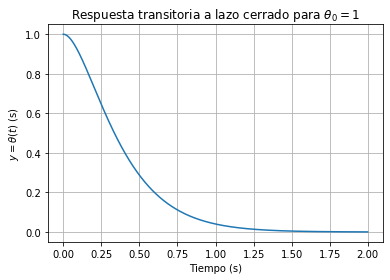

In [13]:
A_closed_loop = sys.A+sys.B*K
C_closed_loop = sys.C+sys.D*K
sys_closed_loop = ctrl.ss(A_closed_loop, sys.B, C_closed_loop, sys.D)
print(sys_closed_loop)

print('Los autovalores a lazo cerrado son: ', np.linalg.eigvals(sys_closed_loop.A))

t_ini = 0
t_final = 2
t_step = 1e-3
t = np.arange(t_ini, t_final, t_step)
x0 = [0, 1/50] # Selecciono condiciones iniciales para el estado. Pensar: ¿por qué me da y(0) = 1?
_, y = ctrl.initial_response(sys_closed_loop, t, x0)
plt.plot(t, y)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel(r'$y = \theta(t)$ (s)')
plt.title(r'Respuesta transitoria a lazo cerrado para $\theta_0 = 1$')
plt.show()

Notar que como predijimos originalmente, la salida sistema a lazo cerrado converge al origen. Ahora podemos explorar qué pasa si usamos una señal de referencia $r(t) \neq 0$. Por ejemplo, queremos llegar a $\theta_{final} = y_{t \to \infty} = \frac{pi}{2}$ y asumimos ingenuamente que el sistema va a llegar a cumplir esa condición si aplicamos un escalón de amplitud $\frac{pi}{2}$.


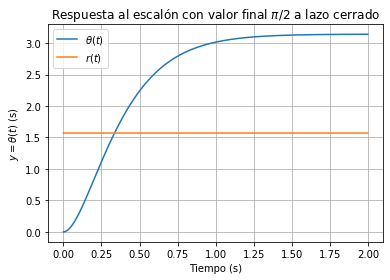

In [14]:
r_final = np.pi/2
r = r_final*np.ones((1, len(t)))
_ , yr = ctrl.forced_response(sys_closed_loop, t, r)
plt.plot(t, yr, label=r'$\theta(t)$')
plt.plot(t, r.transpose(), label=r'$r(t)$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel(r'$y = \theta(t)$ (s)')
plt.title(r'Respuesta al escalón con valor final $\pi/2$ a lazo cerrado')
plt.show()

A simple vista se nota que nuestra suposición fue errónea. La posición final del eje parece estar convergiendo a un valor distinto del esperado. ¿A qué valor parece estar llegando? Evaluemos el último valor simulado:

In [15]:
print('El último valor de y(t) es:', yr[-1])

El último valor de y(t) es: 3.140016597172135


¡Parecería tener una ganacia en continua cercana a 2! La forma más simple de arreglar la diferencia observada es diseñar un bloque precompensador, es decir, ajustarle la entrada de referencia en base a ese factor de corrección. Veamos cómo funciona.

Si definimos $u = Kx + Er$, en donde e corrige la ganancia en continua del sistema. Se llega a:

$$\dot{x} = (A+BK)x + (BE)r$$
$$ y = (C+DK)x + (DE)r $$

En este caso, debemos multiplicar por un factor de 1/2 para eliminar el error final observado. Redefinamos el sistema a lazo cerrado con precompensación y simulemos, ahora para otro valor final para el regulador, por ejemplo, $\theta_{final}$ = -3.

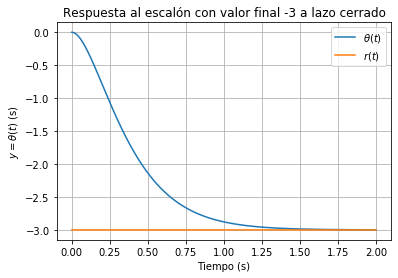

In [16]:
E = 1/2 # Obtenido por exploración del valor final en la simulación
B_prec = E*sys_closed_loop.B
D_prec = E*sys_closed_loop.D
sys_closed_loop_prec = ctrl.ss(sys_closed_loop.A, B_prec, sys_closed_loop.C, D_prec)
r_final = -3
r = r_final*np.ones((1, len(t)))
_ , yr = ctrl.forced_response(sys_closed_loop_prec, t, r)
plt.plot(t, yr, label=r'$\theta(t)$')
plt.plot(t, r.transpose(), label=r'$r(t)$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel(r'$y = \theta(t)$ (s)')
plt.title(r'Respuesta al escalón con valor final -3 a lazo cerrado')
plt.show()

**Ejercicio:**
Usá alguna de las formas propuestas en la clase teórica para obtener el valor exacto del precompensador. Resolvelo mediante la computadora y compará con el valor hallado.

----

**RTA:**

*En la practica se a visto 2 metodos, que en escencia son lo mismo pero dado que estamos trabajando con matrices es mas directo el siguiente metodo:*

Dado que hay un offset, debido a la amplitud de la trasnferencia, entonces se busca la respuesta de y(t) al escalon en tiempo infinito pero es mas facil hacerlo en el dominio de la frecuencia.

Apelando al teorema del valor final:

$$ lim_{t -> \infty} y(t)= lin _{s -> 0} S.Y(s)$$

Por lo que se va a querer buscar la foncion de transferencia $H=\frac{Y(s)}{R(s)}$ de forma de obtener $Y(s)= H(s).R(s)$
Definiendo: **$A_{des}$= A + B.K**, **$B_{des}$= B.E**, **$C_{des}$= C + D.K** y **$D_{des}$= D.E**

$$ H(s)= C_{des}[sI - A_{des}]^{-1} B_{des} + D_{des} $$

Como quiero que siga la referencia, escalon unitario, entonces pido $lim_{t->\infty} y(t)= 1$, entonces:

$$lim_{s -> 0} s.Y(s)= s.H(s).R(s)$$
 con $R(s)= \frac{1}{s}$

entonces la ecuacion completa es: 
$$lim_{s -> 0} s.Y(s)= s.\{ (C+D.K) [sI - A_{des}]^{-1} B.E + D.E \}.R(s)= 1$$
$$= s.\{ (C+D.K) [sI - A_{des}]^{-1} B + D\}E.R(s)= 1$$
reemplazo $R(s)$
$$= s.\{ (C+D.K) [sI - A_{des}]^{-1} B + D\}E.\frac{1}{s}= 1$$
cancelo las $s$ y aplico el limite.
$$= \{ (C+D.K) [- A_{des}]^{-1} B + D\}E= 1$$
Finalmente despejo E de la ecuacion:
$$ E= \frac{1}{ (C+D.K) [- A_{des}]^{-1} B + D} $$
termino de reemplazar lo que queda:

$$ E= \frac{1}{ -(C+D.K) (A+BK)^{-1} B + D} $$


In [17]:
# Inserta tu código aquí
#Rescribo las matrices por problemas de paquetes.
A = symb.Matrix( [[-10, -25], [  1,   0]] )
B = symb.Matrix( [[1], [0]] )
C = symb.Matrix( [[ 0, 50]] )
D =symb.Matrix( [[0]] )

E= ( D - (C + D*K) * (A + B*K).inv() * B ).inv()
print('El valor de E:',E)


El valor de E: Matrix([[1.00000000000000]])


Parecería que a simple vista logramos el objetivo buscado. ¿Qué problema puede tener este enfoque? 

¿Qué sucede si nuestra estimación de la función transferencia tenía un error? ¿o si con el pasar del tiempo el motor se degrada? Supongamos que por alguna de estas razones pasa a tener la siguiente función transferencia:

$$ T(s) = \frac{55}{s (s+5)}$$

Repetimos la simulación pero con los mismos K y E diseñados originalmente:


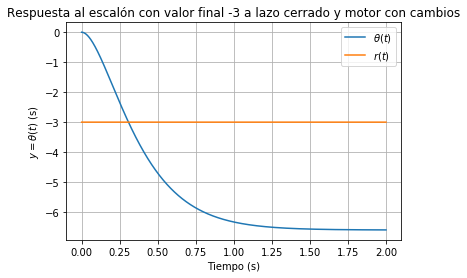

In [18]:
num = [55]
den = [1, 5, 0]
T = ctrl.tf(num, den)
sys = ctrl.tf2ss(T)
A_closed_loop = sys.A+sys.B*K
C_closed_loop = sys.C+sys.D*K
B_closed_loop = sys.B*E
D_closed_loop = sys.D*E
sys_closed_loop_prec = ctrl.ss(A_closed_loop, B_closed_loop, C_closed_loop, D_closed_loop)
r_final = -3
r = r_final*np.ones((1, len(t)))
_ , yr = ctrl.forced_response(sys_closed_loop_prec, t, r)
plt.plot(t, yr, label=r'$\theta(t)$')
plt.plot(t, r.transpose(), label=r'$r(t)$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel(r'$y = \theta(t)$ (s)')
plt.title(r'Respuesta al escalón con valor final -3 a lazo cerrado y motor con cambios')
plt.show()

Notamos que el sistema no va a poder tener una buena regulación. Para lograr esto vamos a tener que recurrir al otro método propuesto en la teórica.


### Motor de CC con seguimiento de referencia robusto

El esquema de control propuesto es el de la siguiente figura:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1xPUFeSKUKmRiAqr8GLJCyK7286iVLvwb' width='700'/>
<figcaption>Realimentación de variables de estado con acción integral</figcaption></center>
</figure>

Debemos agrandar el vector de estado de acuerdo a lo visto en la clase teórica. Queda:

$$ \tilde{x} = \begin{bmatrix} x \\ x_a \end{bmatrix} $$

Para diseñar el control necesitamos definir primero el sistema con estado aumentado:

$$ \dot{\tilde{x}} = \begin{bmatrix} A & 0\\ -C & 0\end{bmatrix} x + \begin{bmatrix} B \\ -D \end{bmatrix} u(t) + \begin{bmatrix} 0 \\ 1\end{bmatrix} r(t)$$

Y al calcular K se llega al sistema completo a lazo cerrado y con acción integral:

$$ \dot{\tilde{x}} = \begin{bmatrix} A+BK & BK_a\\ -C-DK & -DK_a\end{bmatrix} x + \begin{bmatrix} 0 \\ 1 \end{bmatrix} r(t)$$

que nos va a servir para realizar simulaciones.

Armemos la matriz por computadora y calculemos el vector de ganancias aumentado:

$$ \tilde{K} = \begin{bmatrix} K & K_a\end{bmatrix} $$

Redefinimos los dos sistemas, el original y el que resulta de un posible corrimiento de un parámetro medido.

In [19]:
!pip install control
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

num = [50]
den = [1, 5, 0]
T = ctrl.tf(num, den)
delta = 5
T_delta = ctrl.tf(num[0]+delta, den)
print('T(s)=', T)
print('T_delta(s)=', T_delta)
sys = ctrl.tf2ss(T)
sys_delta = ctrl.tf2ss(T_delta)

T(s)= 
   50
---------
s^2 + 5 s

T_delta(s)= 
   55
---------
s^2 + 5 s



Como tenemos que hallar una ganancia adicional, le pasamos tres autovalores en lugar de dos. Con ellos, calculamos las ganancias de la realimentación de estados y la descomponemos en sus dos partes.

In [20]:
l_closed_loop = [-5, -5, -5]
A_tilde = np.bmat([[sys.A, np.zeros((2,1))],[-sys.C, np.zeros((1,1))]])
B_tilde = np.bmat([[sys.B], [-sys.D]])
K_tilde = -ctrl.acker(A_tilde, B_tilde, l_closed_loop)
print('Las ganancias del controlador son: k =', K_tilde)

K = K_tilde[0, 0:-1]
K_a = K_tilde[0, -1]

Las ganancias del controlador son: k = [[-10.  -75.    2.5]]


A continuación, podemos definir el sistema a lazo cerrado con la acción integral calculada, de acuerdo a la ecuación del sistema antes escrita. Hacemos lo mismo para el sistema que tiene un pequeño corrimiento en un parámetro.

In [21]:
A_closed_loop = np.bmat([[sys.A+sys.B*K, sys.B*K_a], [-sys.C-sys.D*K, -sys.D*K_a]])
B_closed_loop = np.bmat([[np.zeros((2,1))],[np.ones((1,1))]])
C_closed_loop = np.bmat([[sys.C, np.zeros((1,1))]])
D_closed_loop = np.zeros((1,1))
sys_closed_loop = ctrl.ss(A_closed_loop, B_closed_loop, C_closed_loop, D_closed_loop)
print('El sistema a lazo cerrado con acción integral es: ', sys_closed_loop)

A_closed_loop_delta = np.bmat([[sys_delta.A+sys_delta.B*K, sys_delta.B*K_a], [-sys_delta.C-sys_delta.D*K, -sys_delta.D*K_a]])
B_closed_loop_delta = np.bmat([[np.zeros((2,1))],[np.ones((1,1))]])
C_closed_loop_delta = np.bmat([[sys_delta.C, np.zeros((1,1))]])
D_closed_loop_delta = np.zeros((1,1))
sys_closed_loop_delta = ctrl.ss(A_closed_loop_delta, B_closed_loop_delta, C_closed_loop_delta, D_closed_loop_delta)
print('El sistema (+delta) a lazo cerrado con acción integral es: ', sys_closed_loop_delta)

El sistema a lazo cerrado con acción integral es:  A = [[-15.  -75.    2.5]
     [  1.    0.    0. ]
     [  0.  -50.   -0. ]]

B = [[0.]
     [0.]
     [1.]]

C = [[ 0. 50.  0.]]

D = [[0.]]

El sistema (+delta) a lazo cerrado con acción integral es:  A = [[-15.  -75.    2.5]
     [  1.    0.    0. ]
     [  0.  -55.   -0. ]]

B = [[0.]
     [0.]
     [1.]]

C = [[ 0. 55.  0.]]

D = [[0.]]



Nos queda comparar las respuestas al escalón en ambos casos. Lo hacemos para obtener la misma salida del caso del precompensador: $\theta_{final} = -3$.


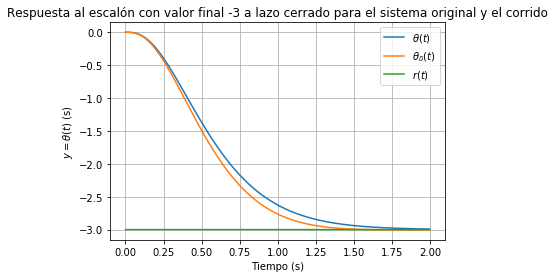

In [22]:
t_ini = 0
t_final = 2
t_step = 1e-3
t = np.arange(t_ini, t_final, t_step)
r_final = -3
r = r_final*np.ones((1, len(t)))
_ , yr = ctrl.forced_response(sys_closed_loop, t, r)
_ , yr_delta = ctrl.forced_response(sys_closed_loop_delta, t, r)
plt.plot(t, yr, label=r'$\theta(t)$')
plt.plot(t, yr_delta, label=r'$\theta_{\delta}(t)$')
plt.plot(t, r.transpose(), label=r'$r(t)$')
plt.grid()
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel(r'$y = \theta(t)$ (s)')
plt.title(r'Respuesta al escalón con valor final -3 a lazo cerrado para el sistema original y el corrido')
plt.show()


Notamos que para ambos casos se alcanza el valor final sin error, aunque uno de ellos parece tener una respuesta un poco más rápida que el otro, posiblemente debido al corrimiento del sistema a controlar propuesto.

## Tarea

**Ejercicio 1:**

Simulación del ejercicio de realimentación MIMO (ver enunciado al inicio del notebook).

**Ejercicio 2:**

Cálculo teórico del precompensador del ejemplo y verificación por simulación.